In [248]:
import csv
from collections import defaultdict
candidates = []
freq = defaultdict(int)
count = 0
with open("unigram_freq.csv", newline="") as f:
    reader = csv.reader(f)
    header = next(reader)
    for row in reader:
        if count >= 5000:
            break
        if len(row[0]) == 5 and row[0].isalpha():
            candidates.append(row[0])
            freq[row[0]] = int(row[1])
            count += 1
stat = defaultdict(set)
for candidate in candidates[:5000]:
    for letter in "abcdefghijklmnopqrstuvwxyz":
        if letter in candidate:
            stat[letter].add(candidate)
        for pos in range(5):
            if candidate[pos] == letter:
                stat["".join([letter, str(pos)])].add(candidate)
stat[""] = set(candidates)
def minusOp(total, negs, stat):
    for neg in negs:
        total -= stat[neg]
    return total
def knownOp(conds, stat):
    if not conds:
        return set(stat[""])
    total = set(stat[conds[0]])
    for cond in conds[1:]:
        total &= stat[cond]
    return total
    
def apply_cond(stat, knowns, negs):
    cand = knownOp(knowns, stat)
    cand = minusOp(cand, negs, stat)
    return cand


In [ ]:
def solver():
    print("Given your prompts in this manner: color [Black Yellow Green Black Green] = _*^_^")
    conds = set()
    negs = set()
    while True:
        guess = input("What did you put: ")
        result = input("What is the returned: ")
        if guess == "exit" or result == "*****":
            break
        for i, (g, elem) in enumerate(zip(guess, result)):
            if elem == "_":
                negs.add(g)
            elif elem == "*":
                negs.add("".join([g,str(i)]))
                conds.add(g)
            else:
                conds.add("".join([g,str(i)]))
        maybe = apply_cond(stat, list(conds), list(negs))
        maybe = sorted(list(maybe), key=lambda k:-freq[k])
        print("Your best shots are ", maybe)
solver()

Given your prompts in this manner: color [Black Yellow Green Black Green] = _*^_^
What did you put: react
What is the returned: ^_*__
Your best shots are  ['radio', 'royal', 'rural', 'rapid', 'roman', 'radar', 'ralph', 'rally', 'randy', 'ranks', 'rails', 'rival', 'rabbi', 'razor', 'rainy', 'rains', 'rowan', 'ramon', 'ramps', 'raids', 'radon', 'ramos', 'raman', 'rayon', 'randi', 'ranma', 'ronan', 'raoul', 'rambo', 'rolla', 'rabid', 'radii', 'rahul', 'radix', 'rohan', 'rabin', 'rawls', 'rosas', 'rdram', 'ragga', 'ronda', 'ryman', 'rhoda']
What did you put: rapid


In [217]:
import random
def play(ans = None, verbose = True):
    if not ans:
        ans = random.choice(candidates)
    conds = set()
    negs = set()
    guess = ""
    while guess != ans:
        while True:
            guess = input("Your guess: ")
            if guess in stat[""]:
                break
        guess.lower()
        maybe, negs, conds, prompt = step(stat, guess, ans, negs, conds)
        if verbose:
            print(maybe)
        print(prompt)
    print("You got it! It is " + ans + ".")
    
def step(stat, guess, ans, negs, conds):
    prompt = ""
    for i in range(5):
        if guess[i] == ans[i]:
            prompt += guess[i].capitalize()
            conds.add("".join([guess[i],str(i)]))
        elif guess[i] in ans:
            prompt += guess[i]
            conds.add(guess[i])
            negs.add("".join([guess[i],str(i)]))
        else:
            negs.add(guess[i])
            prompt += "_"
#         print(conds, negs)
    maybe = apply_cond(stat, list(conds), list(negs))
    maybe = sorted(list(maybe), key=lambda k:-freq[k])[:50]
    return maybe, negs, conds, prompt
    
def solve():
    pass

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2332.63it/s]


4.3537


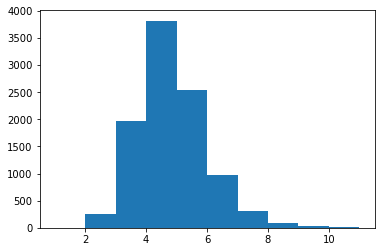

In [242]:
from tqdm import tqdm
import matplotlib.pyplot as plt
def experiment(policy = lambda maybe, knows: random.choice(maybe)):
    num_exp = 10000
    steps_token = []
    for i in tqdm(range(num_exp)):
        guess = "ideal"
        ans = random.choice(candidates)
#         print(guess, ans)
        conds = set()
        negs = set()
        steps = 1
        while guess != ans:
            maybe, negs, conds, prompt = step(stat, guess, ans, negs, conds)
#             print(prompt, maybe, ans)
            guess = policy(maybe, (negs, conds))
#             print(guess)
            steps += 1
        steps_token.append(steps)
#         print(len(stat[""]))
    print(sum(steps_token)/num_exp)
    plt.hist(steps_token)
    plt.show()
experiment()